In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import matplotlib.ticker as mtick

# Conectar ao banco de dados
conn = sqlite3.connect(r'C:\Users\louis\datatech\Database\walmart_fraudes.db')

C:\Users\louis\AppData\Local\Temp\ipykernel_22964\977100566.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='period_of_day', y='missing_rate', data=period_df, palette='Blues_d', order=['Manhã', 'Tarde', 'Noite'])
C:\Users\louis\AppData\Local\Temp\ipykernel_22964\977100566.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='period_of_day', y='problem_order_percentage', data=period_df, palette='Reds_d', order=['Manhã', 'Tarde', 'Noite'])


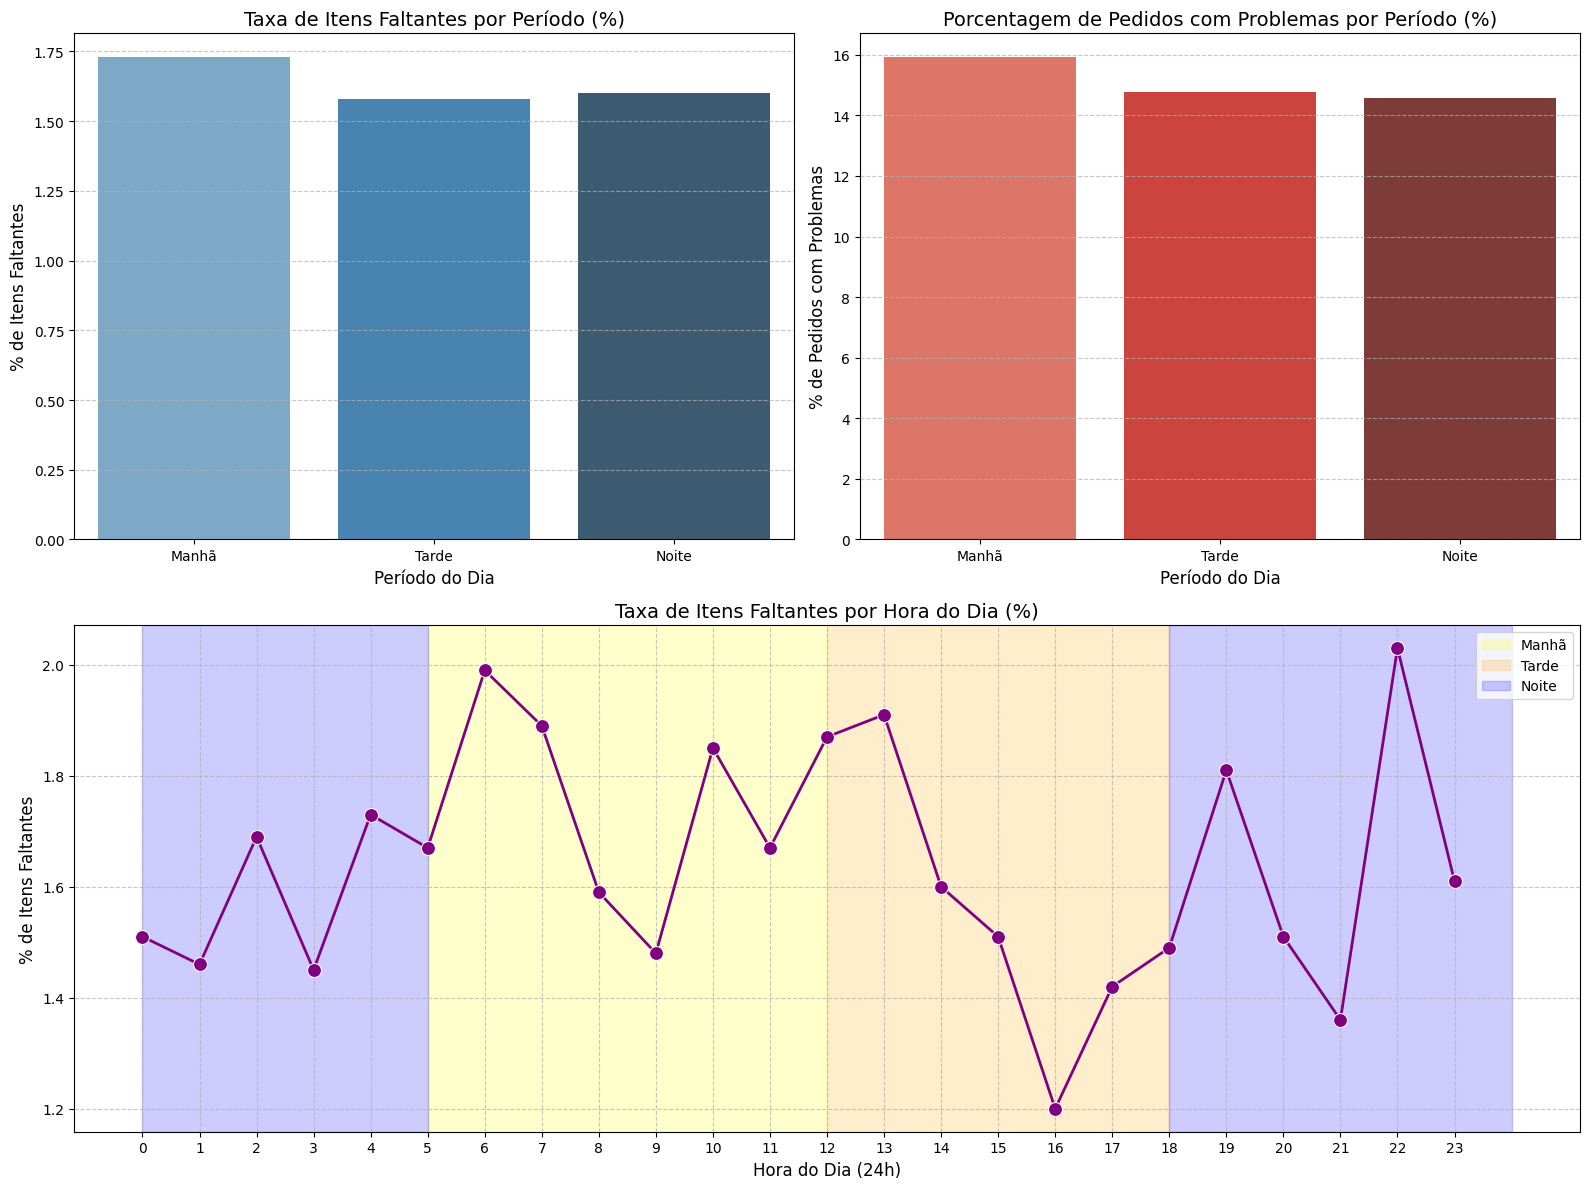

Estatísticas por Período do Dia:
period_of_day  total_orders  total_missing_items  total_delivered_items  missing_rate  problem_order_percentage
        Manhã          2926                  517                  29312          1.73                     15.93
        Tarde          2526                  404                  25168          1.58                     14.77
        Noite          4548                  736                  45214          1.60                     14.58


In [2]:
# Análise por período do dia (manhã, tarde, noite)
query_period = """
SELECT 
    period_of_day,
    COUNT(order_id) AS total_orders,
    SUM(items_missing) AS total_missing_items,
    SUM(items_delivered) AS total_delivered_items,
    ROUND(SUM(items_missing) * 100.0 / (SUM(items_delivered) + SUM(items_missing)), 2) AS missing_rate,
    ROUND(COUNT(CASE WHEN items_missing > 0 THEN 1 END) * 100.0 / COUNT(order_id), 2) AS problem_order_percentage
FROM 
    orders
GROUP BY 
    period_of_day
ORDER BY 
    CASE 
        WHEN period_of_day = 'Manhã' THEN 1
        WHEN period_of_day = 'Tarde' THEN 2
        WHEN period_of_day = 'Noite' THEN 3
    END
"""

period_df = pd.read_sql_query(query_period, conn)

# Análise por hora do dia
query_hour = """
SELECT 
    delivery_hour_only AS hour,
    COUNT(order_id) AS total_orders,
    SUM(items_missing) AS total_missing_items,
    ROUND(SUM(items_missing) * 100.0 / (SUM(items_delivered) + SUM(items_missing)), 2) AS missing_rate,
    ROUND(COUNT(CASE WHEN items_missing > 0 THEN 1 END) * 100.0 / COUNT(order_id), 2) AS problem_order_percentage
FROM 
    orders
GROUP BY 
    delivery_hour_only
ORDER BY 
    delivery_hour_only
"""

hour_df = pd.read_sql_query(query_hour, conn)

# Visualização
plt.figure(figsize=(16, 12))

# Gráfico 1: Taxa de itens faltantes por período do dia
plt.subplot(2, 2, 1)
sns.barplot(x='period_of_day', y='missing_rate', data=period_df, palette='Blues_d', order=['Manhã', 'Tarde', 'Noite'])
plt.title('Taxa de Itens Faltantes por Período (%)', fontsize=14)
plt.xlabel('Período do Dia', fontsize=12)
plt.ylabel('% de Itens Faltantes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: % de pedidos com problemas por período
plt.subplot(2, 2, 2)
sns.barplot(x='period_of_day', y='problem_order_percentage', data=period_df, palette='Reds_d', order=['Manhã', 'Tarde', 'Noite'])
plt.title('Porcentagem de Pedidos com Problemas por Período (%)', fontsize=14)
plt.xlabel('Período do Dia', fontsize=12)
plt.ylabel('% de Pedidos com Problemas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 3: Taxa de itens faltantes por hora do dia
plt.subplot(2, 1, 2)
ax = sns.lineplot(x='hour', y='missing_rate', data=hour_df, marker='o', linewidth=2, markersize=10, color='purple')
plt.title('Taxa de Itens Faltantes por Hora do Dia (%)', fontsize=14)
plt.xlabel('Hora do Dia (24h)', fontsize=12)
plt.ylabel('% de Itens Faltantes', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))

# Adicionar anotações para manhã, tarde e noite
plt.axvspan(5, 12, alpha=0.2, color='yellow', label='Manhã')
plt.axvspan(12, 18, alpha=0.2, color='orange', label='Tarde')
plt.axvspan(18, 24, alpha=0.2, color='blue', label='Noite')
plt.axvspan(0, 5, alpha=0.2, color='blue')
plt.legend()

plt.tight_layout()
plt.show()

# Tabela de estatísticas por período do dia
print("Estatísticas por Período do Dia:")
print(period_df.to_string(index=False))